# Definition of Data Science Problem

The purpose of this project is to build a model that will predict whether customers of the telephone company will churn or not. Telephone companies are struglling with keeping the current customers remain loyal to their services. This is mostly due to diverse offer that exists on the market where every telephone company is trying to come up with new and exciting packages. If the company is able to properly predict what type of customers is more prone to cancel the contract or stop using the services, they can redirect their efforts to trying to keep those customers loyal. This model will be used to provide guidance for telephone company in their efforts to reduce churn rates.

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives

There are some fundamental questions to resolve in this notebook before we move on to building the model.

Do we have the data we need to tackle the desired question?
Is it clear what the target value should be?
Do we have potentially useful features?
Are there any fundamental issues with the data set? How can we further improve it, if possible?

Load the data

In [2]:
churn=pd.read_csv('C:/Users/User/Desktop/Data Science Course/Capstone 2/Customer Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is a column Churn that we want to model on, whereas other columns are potential features. We will further explore them to see if all are relevant and valuable for the model. What we can also see is that most of the features are categorical and object type. There are 7043 entries in total and 21 columns/features.

Let's see if there are any missing values in the dataset.

In [5]:
missing = pd.concat([churn.isnull().sum(), 100 * churn.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by=["count"], ascending=False)

,count,%
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


These are great news! There are no missing values in the dataset, so we will be able to use all observations in our model.

# Exploring the data 

Let's see how representative the data is and whether it covers wide range of possible options. First, we want to understand what are all the possible options behind the features and whether there is any need for cleaning of the data. We will do this using unique and value_counts() methods to understand what are the options and how well they are represented in the data. Next, it would be good to visualize the relationships with different variables to gain more insights in the correlations between them.

In [6]:
churn['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [7]:
churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [8]:
churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [9]:
churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In the features we explored above, we can see that all possible options are well balanced. There is no option that has only a few observations which might not be valuable for the model, therefore we can leave these features as they are. Later on, we will test if all of them are important for the model itself.

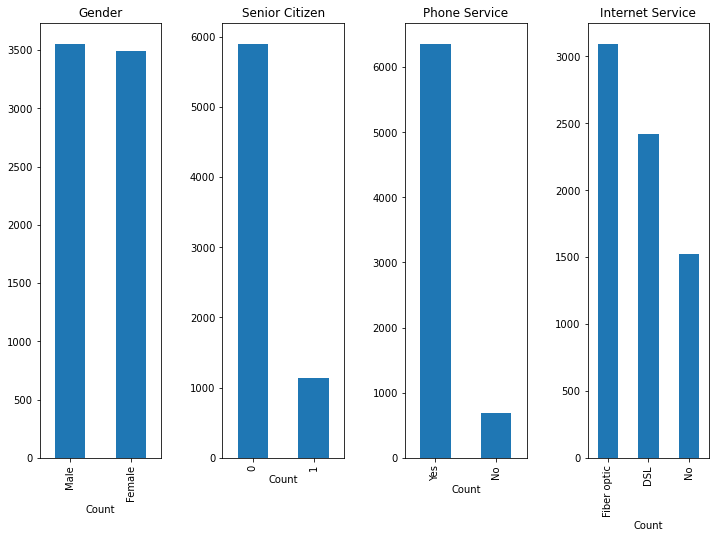

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,8))
churn.gender.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Gender")
ax[0].set_xlabel("Count")
churn.SeniorCitizen.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Senior Citizen")
ax[1].set_xlabel("Count")
churn.PhoneService.value_counts().plot(kind="bar", ax=ax[2])
ax[2].set_title("Phone Service")
ax[2].set_xlabel("Count")
plt.subplots_adjust(wspace=0.5)
churn.InternetService.value_counts().plot(kind="bar", ax=ax[3])
ax[3].set_title("Internet Service")
ax[3].set_xlabel("Count")
plt.subplots_adjust(wspace=0.5);

In terms of Gender, data is very well balanced and we have almost equal representation of male and female customers. In terms of Senior Citizens, it is quite obvious that most of the observants are younger, there is only 1/7 of total customers in the dataset that are considered senior citizens.
Similar inbalance can be seen for Phone Service feature, where the vast majority of customers use phone services, there is only a small percent that do not use it. It might be interesting to see whether this feature will be important for the model or the unequal representation will not give sufficient insights. 

In [12]:
churn['TotalCharges'].dtype

dtype('O')

'TotalCharges' feature is incorrectly defined as object type instead of numeric, therefore let us first change that by using pandas to_numeric option.

In [13]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors = 'coerce')

In [14]:
churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Now we can see that the values for TotalCharges go from only 18.80 in total all the way to 8684.80, however standard deviation is also very high indicating that there is big discrepancy among the data. Let us further explore it to uderstand if there are any obvious outliers which might be the case looking at the statistics.

In [15]:
churn.iloc[churn['TotalCharges'].argmax()]

customerID                         2889-FPWRM
gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          117.8
TotalCharges                           8684.8
Churn                                     Yes
Name: 4610, dtype: object

It is interesting to see that the customer with the highest total charges (contract includes all the services the company is offering), actually churned. The question that arises now - is this also a trend among other customers with higher total charges? If so, this would be a clear red flag for the company that offer strategy should be revised or that maybe actual offer does not fulfill marketing/promotional promises.

In [16]:
churn.iloc[churn['TotalCharges'].argmin()]

customerID                   2967-MXRAV
gender                             Male
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                1
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       One year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                     18.8
TotalCharges                       18.8
Churn                                No
Name: 1654, dtype: object

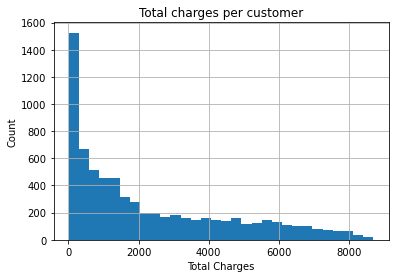

In [17]:
churn.TotalCharges.hist(bins=30)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Total charges per customer');

There is quite a range in terms of total charges covering all the different price options - from very low for basic offer to quite high where almost all, if not all, services are included. This is very good for our modeling as we will be able to observe different scenarios.

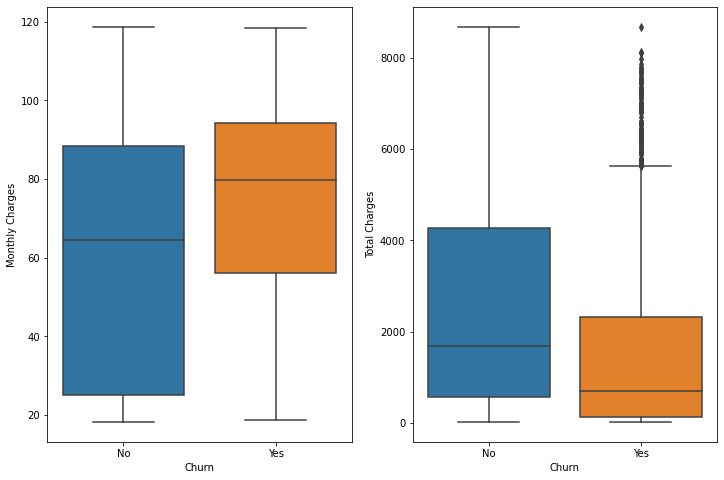

In [18]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))
sns.boxplot(x="Churn", y='MonthlyCharges', data=churn, ax=ax[0])
ax[0].set_ylabel('Monthly Charges')
ax[0].set_xlabel('Churn')
sns.boxplot(x="Churn", y='TotalCharges', data=churn, ax=ax[1])
ax[1].set_ylabel('Total Charges')
ax[1].set_xlabel('Churn');

The boxplots above show how monthly and total charges are behaving separately for churned customers and those that continued using company's services. No clear conclusions can be drown as min and max values for all plots suggests that they all cover whole range of possible charges, however it can be seen that the median value for monthly charges in case of churned customers is higher. Thus, suggesting that customers with higher monthly charges might be more prone to churn. Nevertheless, when observed for total charges this trend cannot be noticed. In that case, we see completely different behaviour. 

Another interesting thing is that interquartile range (50% of the total vlaues) is smaller for the churned customers meaning that those values are much less abundant that those for loyal customers.

We can also observe that in case of Total charges for churned customers we have many outliers.

Let us now explore feature Tenure to better understand the lenth of relationship between customers and company.

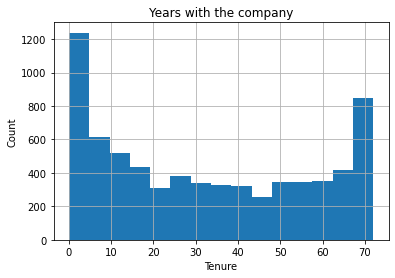

In [19]:
churn.tenure.hist(bins=15)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Years with the company');

In [20]:
churn.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

This is something quite suprising. We can see that the most values fall into the both ends of the histogram. Whereas it makes sense for the smaller values as there are probably many customers that just started using the services or are with the company for only 1-2 years, what is unusual is the other end of the spectrum. It can be noticed that we have many customers with Tenure above 65 years (362 customers with 72 years of using company's services). As it probably cannot be that one person stayed with the company for that long, the plausible reason for it can be that relationship of the whole family (partner or dependants) is considered together. we would need to take this variable with caution.

Let's check if there are any clear trends that can be observed in the data. Let us do scatterplot for Monthly Charges and Tenure, but colored based on churn options.

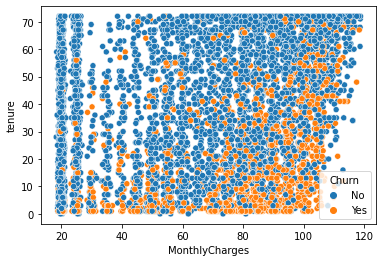

In [21]:
sns.scatterplot(x='MonthlyCharges', y='tenure', data=churn, hue='Churn')
plt.show()

Even though more orange dots (churned customers) are in the right bottom corner, meaning that in case you have high monthly charges and you are only a year or few years with the company, you are more prone to churn, this is not a clear trend for us to make any obvious conclusions. 

# Summary

In [23]:
churn.shape

(7043, 21)

There are 7043 rows and 21 columns. Column "TotalCharges" has been altered as the data was presented as the object type wheres it was clearly numeric. The depedant variable that I want to model on is 'Churn' which shows whether customer of phone company has decided to continue using the services or not. In terms of missing values, the data set was very well organized and there were no missing values to be tackled. I then performed additional data analysis to check if all the feature options are well represented and if there should be some cleaning or grouping of the options that do not have many observants within them. However, the analysis showed that all the features are well balanced and there is no need for any adjustments. Feature 'tenure' had some interesting distribution where there was a lot of customers with more than 70 years with the company, but since that dataset tracks if there are any dependants or partners, this is most probably including the whole family.
Since there are 21 columns in the set, it would be interesting to see if all of them are valuable for the model which might make model quote complex or there are some which are not so crucial in regard to customer churn rates.This is the step I will be tackling next as part of the exploratory data analysis (EDA).